Necessary imports

In [5]:
import warnings
import itertools
#from pandas import datetime
#from pandas import read_csv
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="whitegrid")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd


df_train =df=pd.read_excel("/content/drive/MyDrive/AP moller/DS_ML Coding Challenge Dataset (1).xlsx",sheet_name='Training Dataset')


In [8]:
df_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044


In [9]:
df_train= df_train.sort_values(by='Month of Sourcing', ascending=False)

In [10]:
df_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
410215,NTM3,X1,A24,DIRECT,Small,Powder,2021-05-01,64.463
227368,NTM2,X1,A11,DIRECT,Large,Liquid,2021-05-01,151.696
136731,NTM1,X1,A9,DIRECT,Large,Powder,2021-05-01,146.982
227357,NTM3,X1,A24,DIRECT,Small,Powder,2021-05-01,73.149
...,...,...,...,...,...,...,...,...
420994,NTM1,X2,A43,DIRECT,Small,Powder,2020-07-01,157.094
67975,NTM1,X2,A44,DIRECT,Large,Liquid,2020-07-01,0.001
420992,NTM1,X1,A3,DIRECT,Small,Powder,2020-07-01,136.924
210469,NTM1,X2,A21,DIRECT,Small,Powder,2020-07-01,71.853


In [11]:
df_train.shape

(550176, 8)

In [12]:
df_test=pd.read_excel('/content/drive/MyDrive/AP moller/DS_ML Coding Challenge Dataset (1).xlsx',sheet_name='Test Dataset')
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-21,32.32


In [13]:
df_test = df_test.dropna(how='all')
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-21,32.32


In [14]:
TrainTestCombined = pd.concat([df_train, df_test], ignore_index=True)
TrainTestCombined

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM3,X1,A24,DIRECT,Small,Powder,2021-05-01,64.463
2,NTM2,X1,A11,DIRECT,Large,Liquid,2021-05-01,151.696
3,NTM1,X1,A9,DIRECT,Large,Powder,2021-05-01,146.982
4,NTM3,X1,A24,DIRECT,Small,Powder,2021-05-01,73.149
...,...,...,...,...,...,...,...,...
550267,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-21,89.570
550268,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-21,114.570
550269,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-21,111.260
550270,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-21,32.320


##number of duplicate rows

In [15]:
duplicate_rows_train = df_train[df_train.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows_train = len(duplicate_rows_train)

print("Number of duplicate rows in training set:", num_duplicate_rows_train)

Number of duplicate rows in training set: 541165


In [16]:
duplicate_rows_test = df_test[df_test.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows_test = len(duplicate_rows_test)

print("Number of duplicate rows in testing set:", num_duplicate_rows_test)

Number of duplicate rows in testing set: 0


In [17]:
duplicate_rows = TrainTestCombined[TrainTestCombined.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

print("Number of duplicate rows in combined dataset:", num_duplicate_rows)

Number of duplicate rows in combined dataset: 541165


In [18]:
duplicate_rows

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
20,NTM1,X1,A1,DIRECT,Small,Powder,2021-05-01,114.899
31,NTM1,X1,A33,DIRECT,Large,Powder,2021-05-01,133.300
46,NTM2,X1,A6,DIRECT,Large,Powder,2021-05-01,144.391
52,NTM1,X2,A40,DIRECT,Large,Liquid,2021-05-01,24.479
55,NTM2,X2,A31,DIRECT,Large,Powder,2021-05-01,4.428
...,...,...,...,...,...,...,...,...
550171,NTM1,X2,A43,DIRECT,Small,Powder,2020-07-01,157.094
550172,NTM1,X2,A44,DIRECT,Large,Liquid,2020-07-01,0.001
550173,NTM1,X1,A3,DIRECT,Small,Powder,2020-07-01,136.924
550174,NTM1,X2,A21,DIRECT,Small,Powder,2020-07-01,71.853


In [19]:
(550176-541165)

9011

In [20]:
(550272-542796)

7476

In [23]:
df=df_train.copy()

##Number of null values

In [24]:
null_summary = df.isnull().sum()
null_summary

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550176 entries, 0 to 338840
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 37.8+ MB


##describing the dataset

In [26]:
df.describe()

,Month of Sourcing,Sourcing Cost
count,550176,550176.000000
mean,2020-12-08 10:27:28.769848576,108.816793
min,2020-07-01 00:00:00,-196.070000
25%,2020-10-01 00:00:00,57.000000
50%,2020-12-01 00:00:00,132.000000
75%,2021-03-01 00:00:00,146.147000
max,2021-05-01 00:00:00,32632.500000
std,NaN,104.390097


##number of rows where the soourcing cost is zero

In [27]:
df[df["Sourcing Cost"]==0].count()

ProductType          10084
Manufacturer         10084
Area Code            10084
Sourcing Channel     10084
Product Size         10084
Product Type         10084
Month of Sourcing    10084
Sourcing Cost        10084
dtype: int64

##number of rows where the sourcing cost is negative

In [28]:
negative_entries = df[df['Sourcing Cost'] < 0]

print("Number of rows with negative sourcing cost:", len(negative_entries))

Number of rows with negative sourcing cost: 2231


##categorical columns

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for col in categorical_columns:
    print(col)

Categorical Columns:
ProductType
Manufacturer
Area Code
Sourcing Channel
Product Size
Product Type


##unique entries in each categorical column

In [30]:
for col in categorical_columns:
    unique_entries = df[col].nunique()
    print(f"Number of unique entries in {col}: {unique_entries}")

Number of unique entries in ProductType: 3
Number of unique entries in Manufacturer: 3
Number of unique entries in Area Code: 45
Number of unique entries in Sourcing Channel: 4
Number of unique entries in Product Size: 3
Number of unique entries in Product Type: 2


##outlier detection

In [31]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Sourcing Cost'], dtype='object')

##inter-quartile range

In [32]:
import pandas as pd


def detect_outliers_iqr(column):

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (column < lower_bound) | (column > upper_bound)


numeric_columns = df.select_dtypes(include=['number']).columns
outliers_mask = df[numeric_columns].apply(detect_outliers_iqr)


outliers = df[outliers_mask.any(axis=1)]
print("Rows containing outliers:")
print(outliers)


Rows containing outliers:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
227129        NTM2           X1       A16           DIRECT        Small   
228770        NTM2           X1       A16           DIRECT        Small   
468492        NTM2           X1       A16           DIRECT        Small   
525026        NTM2           X1       A16           DIRECT        Small   
505209        NTM2           X1       A16           DIRECT        Small   
...            ...          ...       ...              ...          ...   
214770        NTM2           X1       A23           RETAIL        Large   
62189         NTM2           X1       A37           DIRECT        Large   
63828         NTM2           X1       A37           DIRECT        Large   
422548        NTM1           X2       A42           DIRECT        Small   
70294         NTM2           X1       A37           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
227129       Powde

In [33]:
# Drop the rows containing outliers
cleaned_df = df[~outliers_mask.any(axis=1)]

# Display information about the removed outliers
print("Number of outliers removed:", outliers.shape[0])

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(cleaned_df)

Number of outliers removed: 2666
DataFrame after removing outliers:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
410215        NTM3           X1       A24           DIRECT        Small   
227368        NTM2           X1       A11           DIRECT        Large   
136731        NTM1           X1        A9           DIRECT        Large   
227357        NTM3           X1       A24           DIRECT        Small   
...            ...          ...       ...              ...          ...   
420994        NTM1           X2       A43           DIRECT        Small   
67975         NTM1           X2       A44           DIRECT        Large   
420992        NTM1           X1        A3           DIRECT        Small   
210469        NTM1           X2       A21           DIRECT        Small   
338840        NTM2           X1        A5           DIRECT        Large   

       Product Type Month of So

In [34]:
df=cleaned_df
len(df)

547510

##Z-score method

In [35]:
from scipy import stats

# Function to detect outliers using Z-score
def detect_outliers_zscore(column, threshold=3):
    z_scores = stats.zscore(column)
    return abs(z_scores) > threshold

# Apply outlier detection to numeric columns in the DataFrame
outliers_mask = df[numeric_columns].apply(detect_outliers_zscore)
outliers = df[outliers_mask.any(axis=1)]
print("Rows containing outliers:")
print(len(outliers))



Rows containing outliers:
24


#Exploratory Data Analysis

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

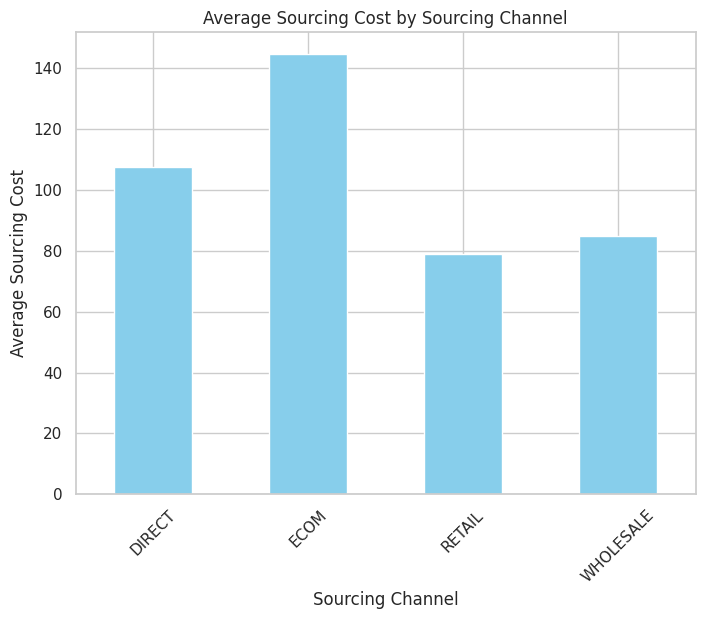

In [107]:
# Bar plot of average 'Sourcing Cost' by 'Sourcing Channel'
plt.figure(figsize=(8, 6))
df.groupby('Sourcing Channel')['Sourcing Cost'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Sourcing Channel')
plt.ylabel('Average Sourcing Cost')
plt.title('Average Sourcing Cost by Sourcing Channel')
plt.xticks(rotation=45)
plt.show()


The Sourcing Channel 'ECOM' tends to have the highest average Sourcing Cost compared to other channels in the dataset.

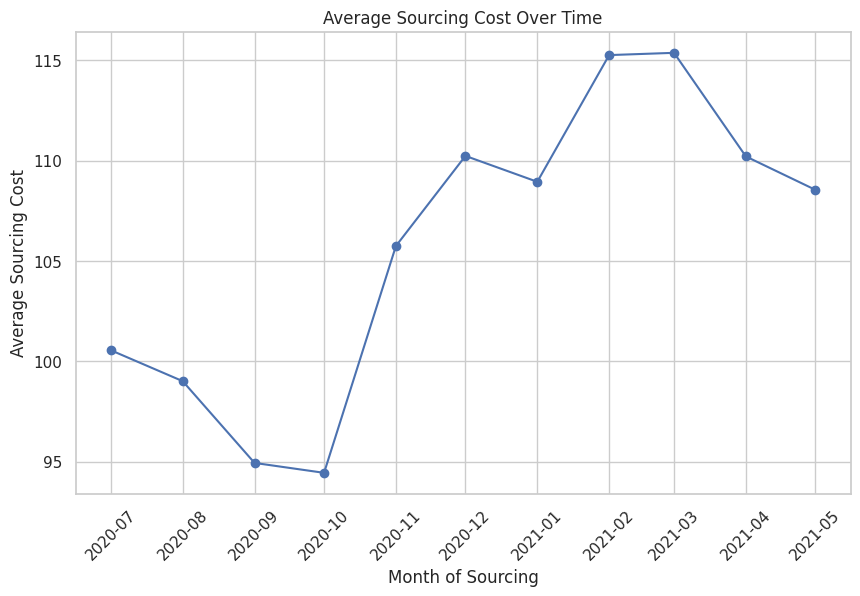

In [108]:
#Time series plot of 'Sourcing Cost' over time(month)
#Note- here i had to downsample the cost value due to the number of values being too large to plot
monthly_sourcing_cost = df.groupby('Month of Sourcing')['Sourcing Cost'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sourcing_cost.index, monthly_sourcing_cost.values, marker='o', linestyle='-')
plt.xlabel('Month of Sourcing')
plt.ylabel('Average Sourcing Cost')
plt.title('Average Sourcing Cost Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


(0.0, 250.0)

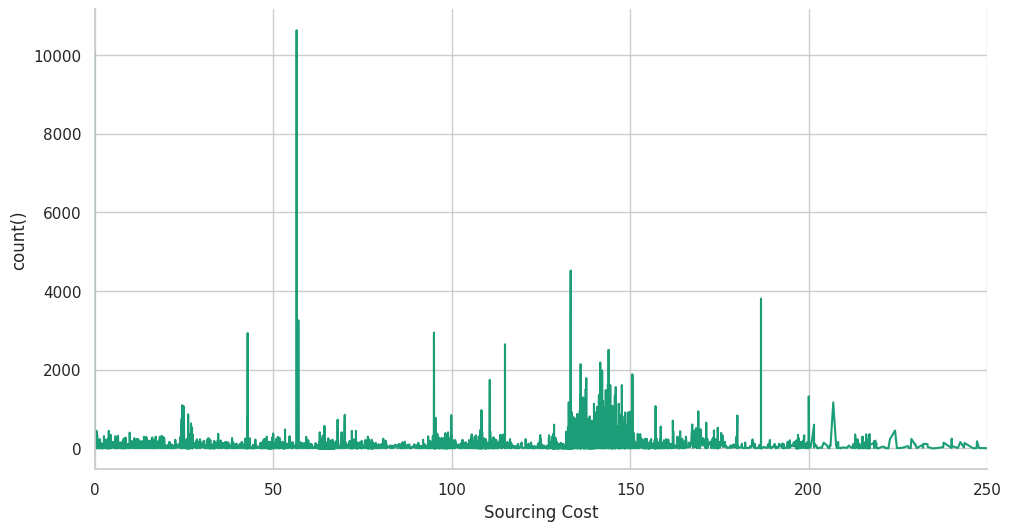

In [109]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sourcing Cost']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sourcing Cost'}, axis=1)
              .sort_values('Sourcing Cost', ascending=True))
  xs = counted['Sourcing Cost']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Sourcing Cost', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sourcing Cost')
_ = plt.ylabel('count()')
plt.xlim(0,250)

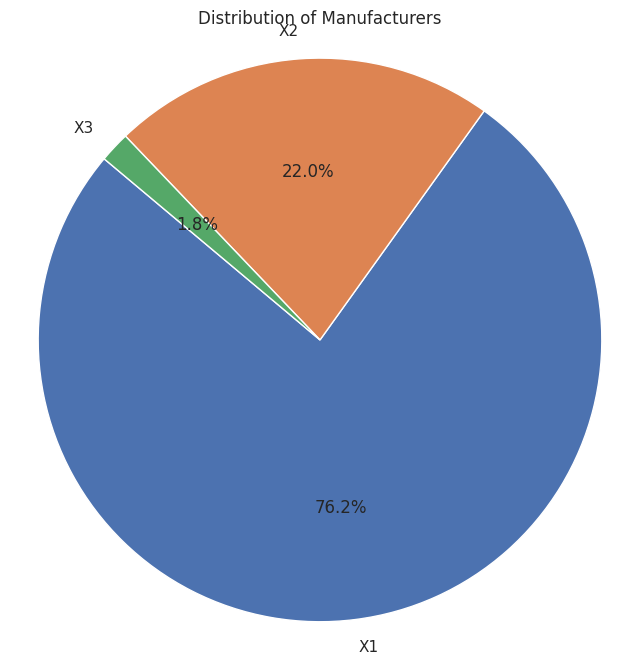

In [110]:
# Pie chart of manufacturers
plt.figure(figsize=(8, 8))
manufacturer_counts = df['Manufacturer'].value_counts()
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Manufacturers')
plt.axis('equal')
plt.show()



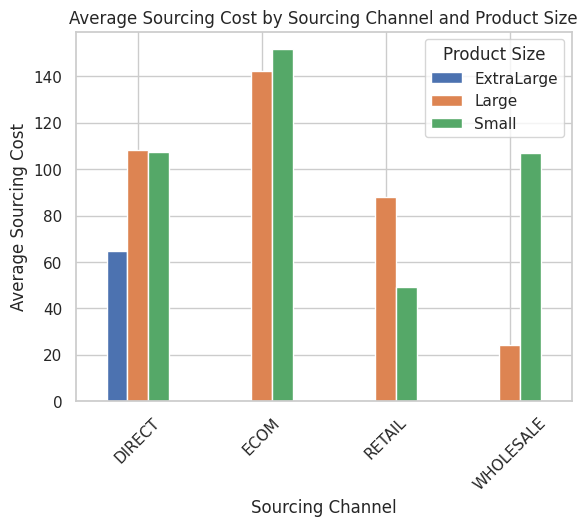

In [114]:
custom_labels = {1: 'Large', 2: 'Small', 0:'Extra Large'}
df.groupby(['Sourcing Channel', 'Product Size'])['Sourcing Cost'].mean().unstack().plot(kind='bar')



plt.xlabel('Sourcing Channel')
plt.ylabel('Average Sourcing Cost')
plt.title('Average Sourcing Cost by Sourcing Channel and Product Size')
plt.xticks(rotation=45)
plt.show()

##Preprocessing

*   encoding
*   feature engineering

*   handle duplicate values

*   scaling of numerical features (when passing to model)
*   missing values(no missing values)
        
*   handling outliers

*   negative entries in sourcing cost





In [44]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
410215,NTM3,X1,A24,DIRECT,Small,Powder,2021-05-01,64.463
227368,NTM2,X1,A11,DIRECT,Large,Liquid,2021-05-01,151.696
136731,NTM1,X1,A9,DIRECT,Large,Powder,2021-05-01,146.982
227357,NTM3,X1,A24,DIRECT,Small,Powder,2021-05-01,73.149


In [45]:
df_training =df.copy()

In [46]:
df_testing=df_test.copy()

In [47]:
from sklearn.preprocessing import LabelEncoder
def label_encode_categorical_columns(df, categorical_columns):
    # Make a copy of the DataFrame to avoid modifying the original
    df_encoded = df.copy()

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate over each categorical column and perform label encoding
    for col in categorical_columns:
        # Fit label encoder and transform the column
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

    return df_encoded

In [48]:
from sklearn.preprocessing import MinMaxScaler
def Normalize_column(df, numeric_columns):
    scaler = MinMaxScaler()
    # Fit and transform the scaler on the numerical columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

In [63]:
label_encoder = LabelEncoder()
df_training=label_encode_categorical_columns(df_training,categorical_columns)

df_training['Month of Sourcing'] = label_encoder.fit_transform(df_training['Month of Sourcing'])
df_testing=label_encode_categorical_columns(df_testing,categorical_columns)
df_testing['Month of Sourcing'] = label_encoder.fit_transform(df_testing['Month of Sourcing'])

In [64]:
df_training.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,10,0.200889
410215,2,0,16,0,2,1,10,0.361896
227368,1,0,2,0,1,0,10,0.620529
136731,0,0,44,0,1,1,10,0.606552
227357,2,0,16,0,2,1,10,0.387648


In [65]:
df_testing.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,0,0.431713
1,0,0,1,0,1,1,0,0.657544
2,0,0,1,1,1,1,0,0.602333
3,0,0,2,0,1,1,0,0.586590
4,0,0,11,0,1,1,0,0.716832


In [66]:
df_training= Normalize_column(df_training, numeric_columns)
df_testing= Normalize_column(df_testing, numeric_columns)

In [67]:
df_training.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,10,0.200889
410215,2,0,16,0,2,1,10,0.361896
227368,1,0,2,0,1,0,10,0.620529
136731,0,0,44,0,1,1,10,0.606552
227357,2,0,16,0,2,1,10,0.387648


In [68]:
df_testing.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,0,0.431713
1,0,0,1,0,1,1,0,0.657544
2,0,0,1,1,1,1,0,0.602333
3,0,0,2,0,1,1,0,0.586590
4,0,0,11,0,1,1,0,0.716832


##traditional machine learning

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming your preprocessed dataset is stored in a pandas DataFrame named 'df'

# Split the dataset into training and testing sets
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_training.drop(["Sourcing Cost"], axis=1), df_training["Sourcing Cost"], test_size=0.2, random_state=42)




In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming your preprocessed dataset is stored in a pandas DataFrame named 'df'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_training.drop(["Sourcing Cost"],axis=1), df_training["Sourcing Cost"], test_size=0.2, random_state=42)



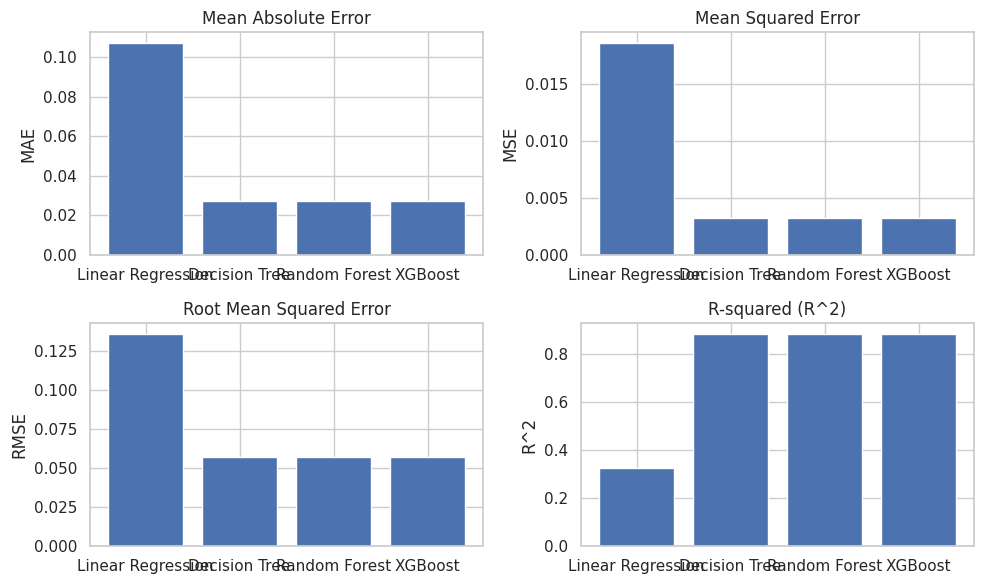

In [71]:
# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()

# Fit models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)

# Calculate error metrics
def calculate_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_linear_reg, mse_linear_reg, rmse_linear_reg, r2_linear_reg = calculate_error_metrics(y_test, y_pred_linear_reg)
mae_decision_tree, mse_decision_tree, rmse_decision_tree, r2_decision_tree = calculate_error_metrics(y_test, y_pred_decision_tree)
mae_random_forest, mse_random_forest, rmse_random_forest, r2_random_forest = calculate_error_metrics(y_test, y_pred_random_forest)
mae_xgboost, mse_xgboost, rmse_xgboost, r2_xgboost = calculate_error_metrics(y_test, y_pred_xgboost)

# Plot evaluation metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_values = [mae_linear_reg, mae_decision_tree, mae_random_forest, mae_xgboost]
mse_values = [mse_linear_reg, mse_decision_tree, mse_random_forest, mse_xgboost]
rmse_values = [rmse_linear_reg, rmse_decision_tree, rmse_random_forest, rmse_xgboost]
r2_values = [r2_linear_reg, r2_decision_tree, r2_random_forest, r2_xgboost]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, mae_values)
plt.title('Mean Absolute Error')
plt.ylabel('MAE')

plt.subplot(2, 2, 2)
plt.bar(models, mse_values)
plt.title('Mean Squared Error')
plt.ylabel('MSE')

plt.subplot(2, 2, 3)
plt.bar(models, rmse_values)
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')

plt.subplot(2, 2, 4)
plt.bar(models, r2_values)
plt.title('R-squared (R^2)')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()

In [72]:
r2_values

[0.3231536406689248,
 0.8821268067235862,
 0.8821184862783993,
 0.8815434326345656]

##Testing

In [73]:
df_testing_1=df_testing.drop(["Sourcing Cost"],axis=1)
df_testing_1["Month of Sourcing"]=11
df_testing_1.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
0,0,0,0,0,2,1,11
1,0,0,1,0,1,1,11
2,0,0,1,1,1,1,11
3,0,0,2,0,1,1,11
4,0,0,11,0,1,1,11


In [74]:
y_test_pred_random_forest = random_forest.predict(df_testing_1)

In [75]:
y_true=df_testing["Sourcing Cost"]
y_true

0     0.431713
1     0.657544
2     0.602333
3     0.586590
4     0.716832
        ...   
91    0.370517
92    0.478943
93    0.464588
94    0.122219
95    0.158694
Name: Sourcing Cost, Length: 96, dtype: float64

In [76]:
r2 = r2_score(y_true, y_test_pred_random_forest)
r2

0.6088622798782557

##Deep learning approaches for time series


In [77]:
df_training.drop(columns=['Sourcing Cost'])

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
0,2,0,19,3,1,1,10
410215,2,0,16,0,2,1,10
227368,1,0,2,0,1,0,10
136731,0,0,44,0,1,1,10
227357,2,0,16,0,2,1,10
...,...,...,...,...,...,...,...
420994,0,1,36,0,2,1,0
67975,0,1,37,0,1,0,0
420992,0,0,21,0,2,1,0
210469,0,1,13,0,2,1,0


#LSTM(Best model)

In [78]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 3: Prepare data
X = df_training.drop(columns=['Sourcing Cost']).values  # Input features (all columns except 'Sourcing Cost')
y = df_training['Sourcing Cost'].values  # Target variable

# Reshape input features for LSTM (assuming a single time step)
# The reshape is necessary for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 8: Make forecasts
# You can make forecasts using model.predict() on new data
# Example: y_pred = model.predict(X_new_data)


In [79]:
X_train.shape

(438008, 1, 7)

In [80]:
lstm_model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

Epoch 1/25
13688/13688 [==============================] - 52s 3ms/step - loss: 0.0104
Epoch 2/25
13688/13688 [==============================] - 45s 3ms/step - loss: 0.0083
Epoch 3/25
13688/13688 [==============================] - 45s 3ms/step - loss: 0.0079
Epoch 4/25
13688/13688 [==============================] - 44s 3ms/step - loss: 0.0075
Epoch 5/25
13688/13688 [==============================] - 44s 3ms/step - loss: 0.0073
Epoch 6/25
13688/13688 [==============================] - 45s 3ms/step - loss: 0.0070
Epoch 7/25
13688/13688 [==============================] - 46s 3ms/step - loss: 0.0067
Epoch 8/25
13688/13688 [==============================] - 47s 3ms/step - loss: 0.0063
Epoch 9/25
13688/13688 [==============================] - 45s 3ms/step - loss: 0.0060
Epoch 10/25
13688/13688 [==============================] - 45s 3ms/step - loss: 0.0056
Epoch 11/25
13688/13688 [==============================] - 46s 3ms/step - loss: 0.0053
Epoch 12/25
13688/13688 [===========================

In [ ]:
model_file_path = 'lstm_model.h5'

# Save the model
lstm_model.save(model_file_path)

print("LSTM model saved successfully at:", model_file_path)

3422/3422 [==============================] - 8s 2ms/step


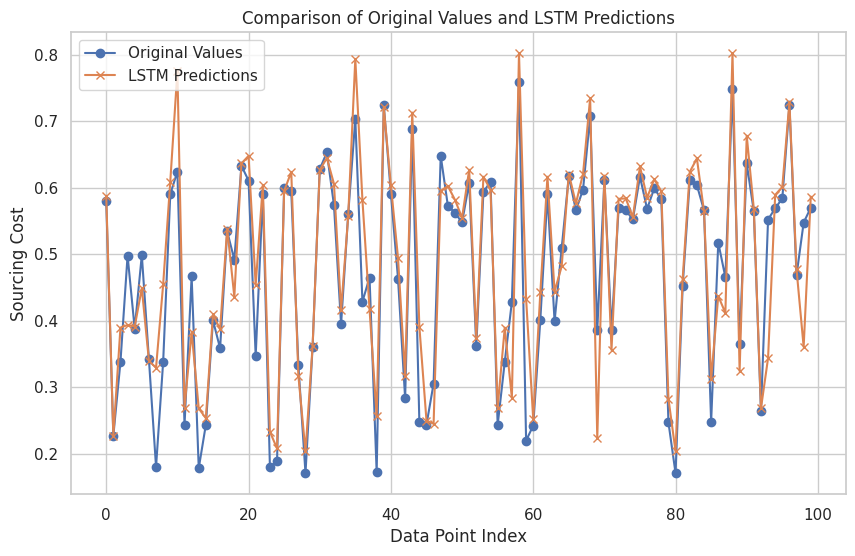

In [81]:
import matplotlib.pyplot as plt

# Step 1: Make predictions using the trained LSTM model
y_pred = lstm_model.predict(X_test)

# Step 2: Extract the first 100 data points from the original dataset and LSTM predictions
original_values = y_test[:100]  # Original values
predicted_values = y_pred[:100]  # LSTM predictions

# Step 3: Plot the original values and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(original_values, label='Original Values', marker='o')
plt.plot(predicted_values, label='LSTM Predictions', marker='x')
plt.title('Comparison of Original Values and LSTM Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
r2 = r2_score(original_values, predicted_values)
r2

0.8421635064329565

##TESTING DATASET

In [88]:
from sklearn.preprocessing import LabelEncoder

# Assuming your training set DataFrame is named 'train_df'
# Assuming 'categorical_columns' is a list containing the names of categorical columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and perform label encoding
for col in categorical_columns:
    # Fit label encoder and transform the column
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [89]:
df_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,2021-06-21,103.68
1,0,0,1,0,1,1,2021-06-21,155.75
2,0,0,1,1,1,1,2021-06-21,143.02
3,0,0,2,0,1,1,2021-06-21,139.39
4,0,0,11,0,1,1,2021-06-21,169.42


In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the numerical columns
df_test[numeric_columns] = scaler.fit_transform(df_test[numeric_columns])

In [91]:
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,2021-06-21,0.431713
1,0,0,1,0,1,1,2021-06-21,0.657544
2,0,0,1,1,1,1,2021-06-21,0.602333
3,0,0,2,0,1,1,2021-06-21,0.586590
4,0,0,11,0,1,1,2021-06-21,0.716832
...,...,...,...,...,...,...,...,...
91,2,0,37,0,2,0,2021-06-21,0.370517
92,2,0,43,0,1,1,2021-06-21,0.478943
93,2,0,43,0,2,1,2021-06-21,0.464588
94,2,1,12,0,1,1,2021-06-21,0.122219


In [92]:
df_test["Month of Sourcing"] = label_encoder.fit_transform(df_test["Month of Sourcing"])

In [93]:
df_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,0,0.431713
1,0,0,1,0,1,1,0,0.657544
2,0,0,1,1,1,1,0,0.602333
3,0,0,2,0,1,1,0,0.586590
4,0,0,11,0,1,1,0,0.716832


In [94]:
X = df_test.drop(columns=['Sourcing Cost']).values  # Input features (all columns except 'Sourcing Cost')
y = df_test['Sourcing Cost'].values  # Target variable

# Reshape input features for LSTM (assuming a single time step)
# The reshape is necessary for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])


In [95]:
X.shape

(96, 1, 7)

3/3 [==============================] - 0s 4ms/step


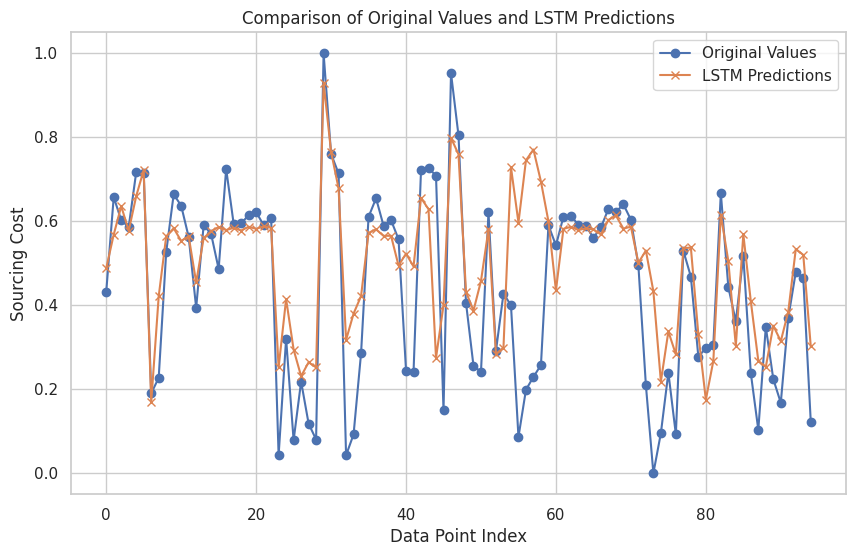

In [96]:
import matplotlib.pyplot as plt

# Step 1: Make predictions using the trained LSTM model
y_pred = lstm_model.predict(X)

# Step 2: Extract the first 100 data points from the original dataset and LSTM predictions
original_values = y[:-1]  # Original values
predicted_values = y_pred[:-1]  # LSTM predictions

# Step 3: Plot the original values and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(original_values, label='Original Values', marker='o')
plt.plot(predicted_values, label='LSTM Predictions', marker='x')
plt.title('Comparison of Original Values and LSTM Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

as we can see, LSTM is able to classify and forcast the points quite accurately